In [1]:
import json
import pandas as pd
import seaborn
import boto

%matplotlib inline

from IPython.core.display import HTML

css ="""
body {
    margin: 0;
    font-family: Helvetica;
}
table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 1px solid white;
    padding-left: 0.25em;
    padding-right: 0.25em;
}
table.dataframe th:not(:empty) {
    background-color: #fec;
    text-align: left;
    font-weight: normal;
}
table.dataframe tr:nth-child(2) th:empty {
    border-left: none;
    border-right: 1px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}"""

HTML('<style>{}</style>'.format(css))

In [2]:
j = json.load(open('tags.json'))

In [3]:
for key in j.keys():
    print j[key]['name']

UCSD-Main-EBU3B-Flr-4-Rm-4205-Zone Temperature Error
UCSD-Main-EBU3B-2119-Reheat Valve-Stuck
UCSD-Main-EBU3B-Flr-4-Rm-4128-Cooling Command
UCSD-Main-EBU3B-B260A-Cooling Command-Setpoint|Command Error
alg-VAV Heating Check
UCSD-Main-EBU3B-Flr-R-Rm-4213-HVAC Zone Power
UCSD-Main-EBU3B-Flr-2-Rm-2127-Actual Cooling Setpoint
UCSD-Main-EBU3B-Flr-4-Rm-4232-Common Setpoint
UCSD-Main-EBU3B-Flr-4-Rm-4217-Common Setpoint
UCSD-Main-EBU3B-Flr-1-Rm-1114-Occupant Sensation
UCSD-Main-EBU3B-Flr-1-RM-1124-Occupied Command
UCSD-Main-EBU3B-1155-Damper Command-Setpoint|Command Error
UCSD-Main-EBU3B-Infrastructure-ServerRoom-Server Room Thermal Power
UCSD-Main-EBU3B-3122-Actual Heating Setpoint-Setpoint|Command Error
UCSD-Main-EBU3B-Flr-C-Rm-C1100C-WiFi Occupancy Status
UCSD-Main-EBU3B-2231-Heating Command-Setpoint|Command Error
UCSD-Main-EBU3B-Flr-3-Rm-3200A-Actual Cooling Setpoint
UCSD-Main-EBU3B-Flr-3-Rm-3254-Occupied Clg Min
UCSD-Main-EBU3B-B109-Actual Supply Flow Setpoint-Setpoint|Command Error
UCSD-Ma

In [4]:
df1 = pd.read_json('DF_10003.json', orient='split')
df1.head()

,sensor_id,timeseries,values,room,template
0,6107794c-77df-11e2-bad4-00163e005319,2013-07-01T07:00:45+00:00,-0.14,Rm-3256,PresentValue
1,6107794c-77df-11e2-bad4-00163e005319,2013-07-01T07:05:56+00:00,-0.14,Rm-3256,PresentValue
2,6107794c-77df-11e2-bad4-00163e005319,2013-07-01T07:12:32+00:00,-0.14,Rm-3256,PresentValue
3,6107794c-77df-11e2-bad4-00163e005319,2013-07-01T07:17:42+00:00,-0.14,Rm-3256,PresentValue
4,6107794c-77df-11e2-bad4-00163e005319,2013-07-01T07:24:03+00:00,-0.14,Rm-3256,PresentValue


In [5]:
df2 = pd.read_json('DF_9629.json', orient='split')
df2.head()

,sensor_id,timeseries,values,room,template
0,76d4ba8c-7806-11e3-8cf6-00163e005319,2014-01-08T01:45:29+00:00,0,Rm-3215,PresentValue
1,76d4ba8c-7806-11e3-8cf6-00163e005319,2014-01-08T01:50:02+00:00,0,Rm-3215,PresentValue
2,76d4ba8c-7806-11e3-8cf6-00163e005319,2014-01-08T01:55:03+00:00,0,Rm-3215,PresentValue
3,76d4ba8c-7806-11e3-8cf6-00163e005319,2014-01-08T02:00:02+00:00,0,Rm-3215,PresentValue
4,76d4ba8c-7806-11e3-8cf6-00163e005319,2014-01-08T02:05:02+00:00,0,Rm-3215,PresentValue


In [10]:
df_1 = pd.read_json('DF_00_split0.json', orient='split')
df_2 = pd.read_json('DF_010_split3.json', orient='split')
df_3 = pd.read_json('DF_010_split4.json', orient='split')
df_4 = pd.read_json('DF_010_split5.json', orient='split')
df_5 = pd.read_json('DF_010_split6.json', orient='split')

In [13]:
df_all = pd.concat([df_1, df_2, df_3, df_4, df_5])
df_all.head()

,values,sensor_value,room,sensor_id
2013-09-27 15:08:28,179.75,PresentValue,HW-SYS,9f50629c-74c7-11e2-a42d-00163e005319
2014-02-26 22:42:23,144.88,PresentValue,HW-SYS,9f50629c-74c7-11e2-a42d-00163e005319
2015-03-06 16:46:31,173.13,PresentValue,HW-SYS,9f50629c-74c7-11e2-a42d-00163e005319
2013-07-10 16:33:47,162.63,PresentValue,HW-SYS,9f50629c-74c7-11e2-a42d-00163e005319
2014-02-14 08:31:30,170.50,PresentValue,HW-SYS,9f50629c-74c7-11e2-a42d-00163e005319


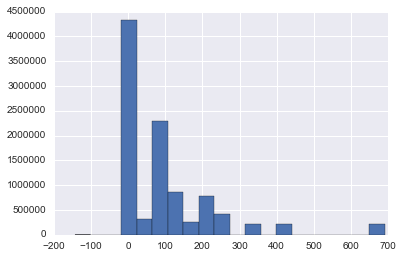

In [14]:
df_all['values'].hist(bins=20)

In [8]:
(df3['values'] < 0).sum() *1.0 / df3.sensor_value.count()

0.012235142232663369

In [9]:
!ls

DF_00_split0.json
DF_010_split3.json
DF_010_split4.json
DF_010_split5.json
DF_010_split6.json
DF_100.json
DF_10003.json
DF_9629.json
Untitled.ipynb
fyp.ktr
list.html
tags.json
